In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import dateutil as du
%pylab inline

execfile('/Users/raghuramkowdeed/Documents/afp/models/quintile_model.py')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('/Users/raghuramkowdeed/Desktop/rps_signals.csv')

In [3]:
data.shape

(2014986, 150)

In [63]:
names = data.columns.sort_values()
#names = [ x.lower() for x in names]

for name in names :
    print name

BETA
DATE
DLRET
DLSTCD
EXCHCD
IPO
MEANEST
MEANREC
RET
SHROUT
VOL
absacc
acc
aeavol
age
agr
baspread
betasq
bm
bm_ia
cash
cashdebt
cashpr
cf
cfp
cfp_ia
chadv
chato
chatoia
chcsho
chdrc
chempia
chfeps
chinv
chmom
chnanalyst
chobklg
chpm
chpmia
chrec
chtx
cinvest
conv
convind
count
credrat
credrat_dwn
currat
datadate
depr
disp
divi
divo
dolvol
dy
eamonth
ear
egr
ep
ewret
fgr5yr
fyear
gma
grGW
grcapx
grltnoa
gvkey
herf
hire
i
idiovol
ill
indmom
invest
j
lev
lgr
ltg
maxret
mom12m
mom1m
mom36m
mom6m
ms
mve
mve_f
mve_ia
mve_m
nanalyst
nincr
obklg
operprof
orgcap
pchcapx
pchcapx_ia
pchcurrat
pchdepr
pchgm_pchsale
pchquick
pchsale_pchinvt
pchsale_pchrect
pchsale_pchxsga
pchsaleinv
pctacc
permno
pps
prc
prccq
pricedelay
ps
quick
rd
rd_mve
rd_sale
rdbias
rdq
realestate
retcons_neg
retcons_pos
retvol
roaq
roavol
roe
roeq
roic
rsq1
rsup
salecash
saleinv
salerec
secured
securedind
sfe
sgr
sgrvol
sic2
sin
sp
spi
spii
std_dolvol
std_turn
stdacc
stdcf
sue
tang
tb
turn
woGW
zerotrade


In [55]:
start_year = 1995
start_date = dt.datetime.strptime(str(start_year)+'0101','%Y%m%d')
end_year = 2015
end_date = dt.datetime.strptime(str(end_year)+'0101','%Y%m%d')

In [56]:
rebalance_dates = []
curr_date = start_date
while curr_date <= end_date :
    rebalance_dates.append(curr_date)
    curr_date = curr_date +  du.relativedelta.relativedelta(years=1)




In [57]:
l_ic_vec = []
nl_ic_vec = []
comb_ic_vec = []
nl_l_corr_vec = []
model_vec = []

In [58]:
look_back = 5
sig_name = 'mom12m'
num_buckets = 10


In [59]:
for r_d in rebalance_dates :
    train_end_date = r_d - du.relativedelta.relativedelta(years=1) 
    train_end_year = train_end_date.year
    
    train_start_date = train_end_date - du.relativedelta.relativedelta(years=look_back)
    train_start_year = train_start_date.year
    
    curr_year = r_d.year
    
    train_data = data
    train_data = train_data[train_data['fyear']>=train_start_year]
    train_data = train_data[train_data['fyear']<=train_end_year]
    
    test_data = data
    test_data = test_data[test_data['fyear']==curr_year]

    
    model = QuintileSort(num_buckets,'median')

    train_x = train_data[sig_name]
    train_y = train_data['RET']

    model.fit(train_x,train_y)

    #model.ret_profile.plot(kind='bar')

    test_x = test_data[sig_name]
    test_y = test_data['RET']

    nl_pred_ret = model.predict(test_x)
    nl_pred_ret = nl_pred_ret/nl_pred_ret.std()
    
    nl_corr = nl_pred_ret.corr(test_y)
    
    beta = train_x.corr(train_y) * train_y.std() / train_x.std()
    l_pred_ret = test_x*beta
    l_pred_ret = l_pred_ret/l_pred_ret.std()
    
    l_corr = l_pred_ret.corr(test_y)

    comb_pred_ret = ( nl_pred_ret + l_pred_ret )/2.0
    comb_corr = comb_pred_ret.corr(test_y)
    
    
    nl_l_corr = nl_pred_ret.corr(l_pred_ret)
    
    
    l_ic_vec.append(l_corr)
    nl_ic_vec.append(nl_corr)
    
    comb_ic_vec.append(comb_corr)
    
    nl_l_corr_vec.append(nl_l_corr)
    
    model_vec.append(model)
    
    
    print( r_d,l_corr, nl_corr )
    
df = pd.DataFrame()
df['l_corr'] = l_ic_vec
df['nl_corr'] = nl_ic_vec
df['comb_ic'] = comb_ic_vec
df['nl_l_corr'] = nl_l_corr_vec

df.index = rebalance_dates

(datetime.datetime(1995, 1, 1, 0, 0), -0.01727188572880937, 0.009733259842092608)
(datetime.datetime(1996, 1, 1, 0, 0), -0.005246680568309036, 0.01194277051300968)
(datetime.datetime(1997, 1, 1, 0, 0), 0.01073992317707247, -0.0018366417180636445)
(datetime.datetime(1998, 1, 1, 0, 0), 0.0408410639335772, -0.0277578382329527)
(datetime.datetime(1999, 1, 1, 0, 0), -0.008456135835622871, 0.028272816251032406)
(datetime.datetime(2000, 1, 1, 0, 0), -0.017490601411599225, 0.017874237596176568)
(datetime.datetime(2001, 1, 1, 0, 0), 0.03334028352097386, -0.02760339010819175)
(datetime.datetime(2002, 1, 1, 0, 0), 0.024003955706989447, -0.023266432189109284)
(datetime.datetime(2003, 1, 1, 0, 0), -0.018532547941750882, 0.021065238508514248)
(datetime.datetime(2004, 1, 1, 0, 0), -0.010282931903837415, 0.005782698513520024)
(datetime.datetime(2005, 1, 1, 0, 0), 0.006464711675858624, 0.011551615916152514)
(datetime.datetime(2006, 1, 1, 0, 0), -0.012781952999013574, 0.025818141548479317)
(datetime.dat

In [60]:
df

,l_corr,nl_corr,comb_ic,nl_l_corr
1995-01-01,-0.017272,0.009733,-0.005497,-0.032868
1996-01-01,-0.005247,0.011943,0.004794,-0.044522
1997-01-01,0.010740,-0.001837,0.006063,-0.056673
1998-01-01,0.040841,-0.027758,0.011204,-0.300410
1999-01-01,-0.008456,0.028273,0.014990,-0.123963
2000-01-01,-0.017491,0.017874,0.002164,-0.341548
2001-01-01,0.033340,-0.027603,0.005572,-0.495887
2002-01-01,0.024004,-0.023266,0.000657,-0.416457
2003-01-01,-0.018533,0.021065,0.002030,-0.216789
2004-01-01,-0.010283,0.005783,-0.003857,-0.307785


In [61]:
df.mean()

l_corr       0.002257
nl_corr      0.006229
comb_ic      0.006908
nl_l_corr   -0.216662
dtype: float64

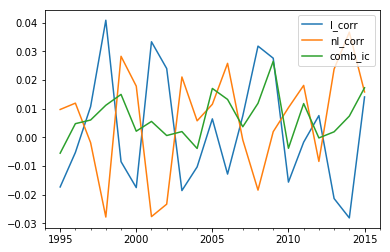

In [62]:
df[ ['l_corr', 'nl_corr', 'comb_ic']].plot()